TASK 16:
Iris Dataset

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [21]:
df=pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
print("Missing values:")
df.isnull().sum()

Missing values:


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [23]:
# Separate features and target
X = df.drop(columns=['species'])
y = df['species']

1. Implementing K-Means Clustering
Task: Apply K-Means clustering to the Iris dataset and visualize the clusters using a scatter plot of two features. Evaluate the clustering by comparing it to the actual species labels.

In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  
kmeans.fit(X)
clusters = kmeans.labels_

# Add the cluster labels to the DataFrame
df['cluster'] = clusters

Text(0, 0.5, 'sepal_width')

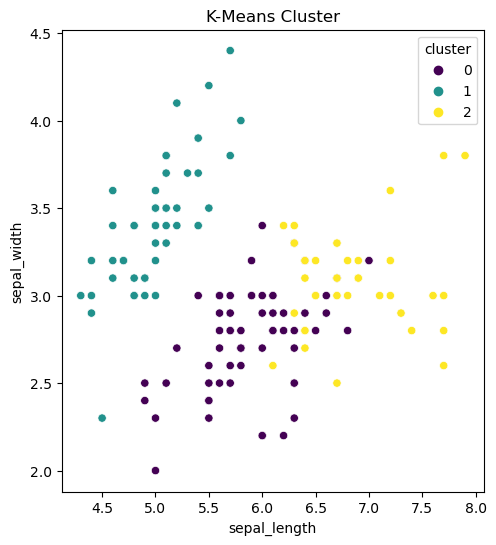

In [26]:
# visulize the k-mean cluster using a scatter plot of two features
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:, 1], hue=df['cluster'], data=df, palette = 'viridis')
plt.title('K-Means Cluster')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])

Text(0, 0.5, 'sepal_width')

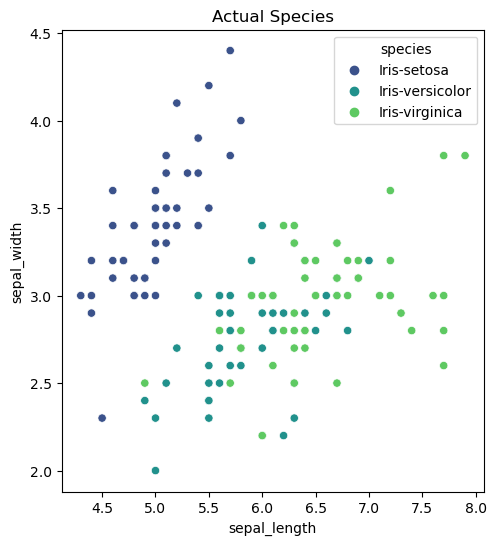

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,2)
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:, 1], hue=df['species'], data=df, palette = 'viridis')
plt.title('Actual Species')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])

2. Choosing the Optimal Number of Clusters
Task: Use the Elbow Method and Silhouette Score to determine the optimal number of clusters for the Iris dataset. Visualize the Silhouette Score for different cluster counts.

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

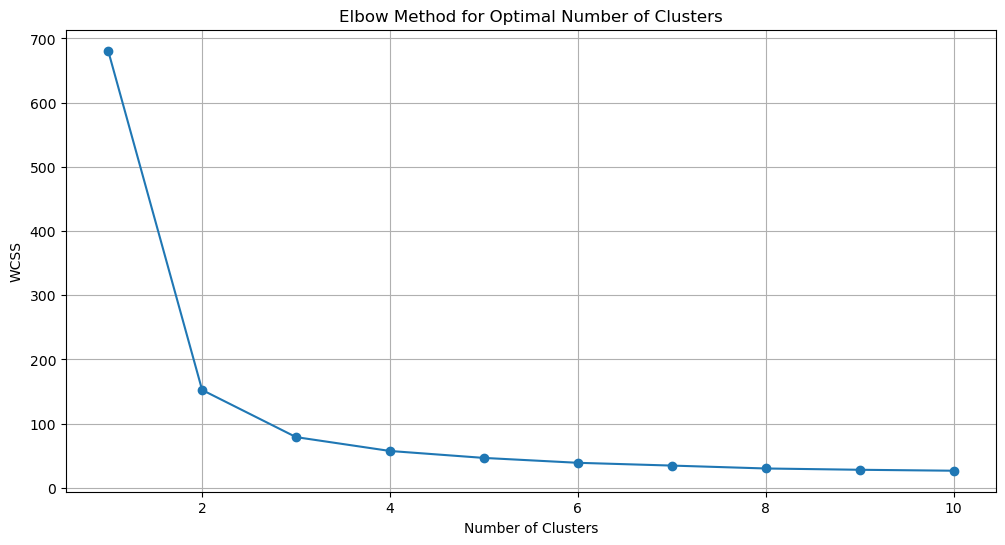

In [37]:
# Plot WCSS to identify the elbow point
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
# Determine the optimal number of clusters using the Silhouette Score
silhouette_scores = []
for i in range(2, 11):  
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    silhouette_scores.append(silhouette_avg)

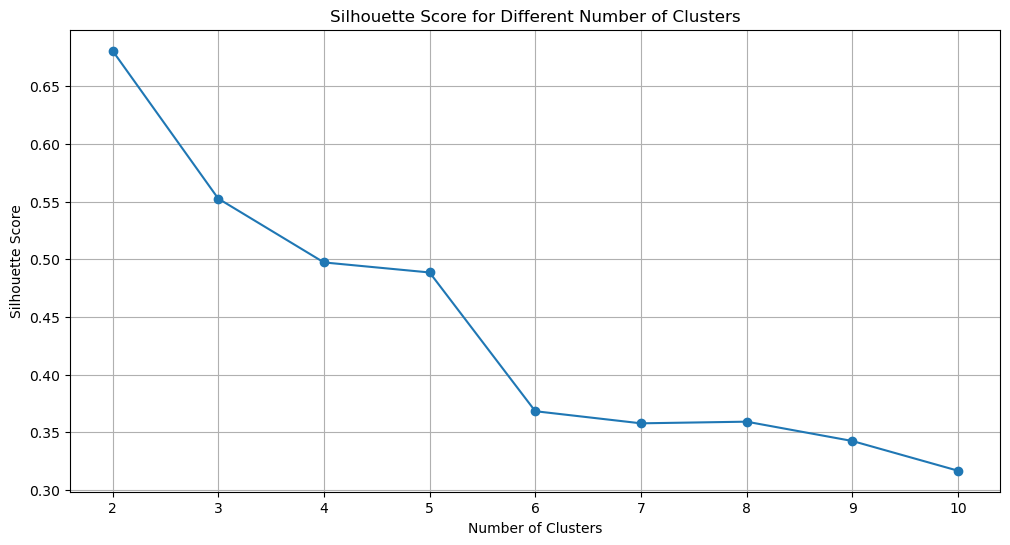

In [11]:
# Plot Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

3. Cluster Visualization with PCA
Task: Use Principal Component Analysis (PCA) to reduce the Iris dataset to two dimensions. Visualize the clusters obtained from K-Means clustering in the PCA-reduced space.

In [ ]:
# Apply PCA to reduce the dataset to two dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_pca)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

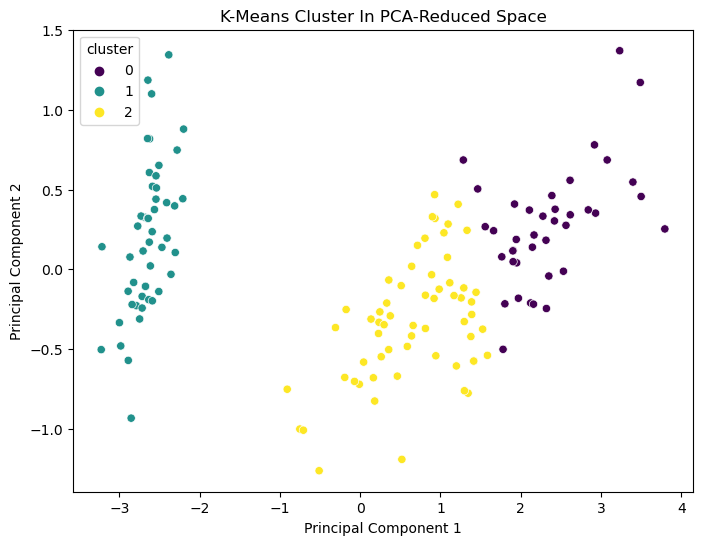

In [13]:
plt.figure(figsize =(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette = 'viridis')
plt.title('K-Means Cluster In PCA-Reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

4. Hierarchical Clustering: Dendrogram
Task: Implement hierarchical clustering using the Iris dataset. Plot a dendrogram to visualize the clustering process and choose an appropriate number of clusters.

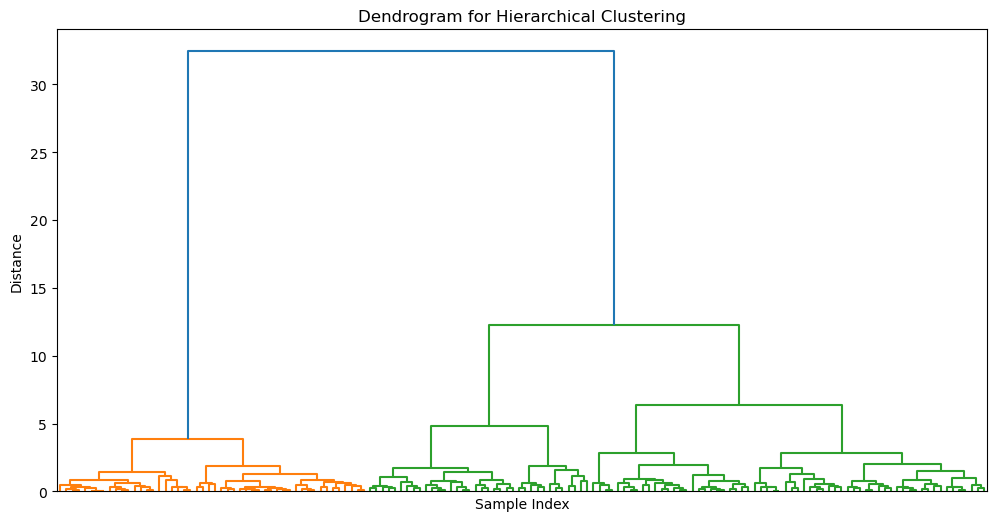

In [30]:
# Apply hierarchical clustering
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

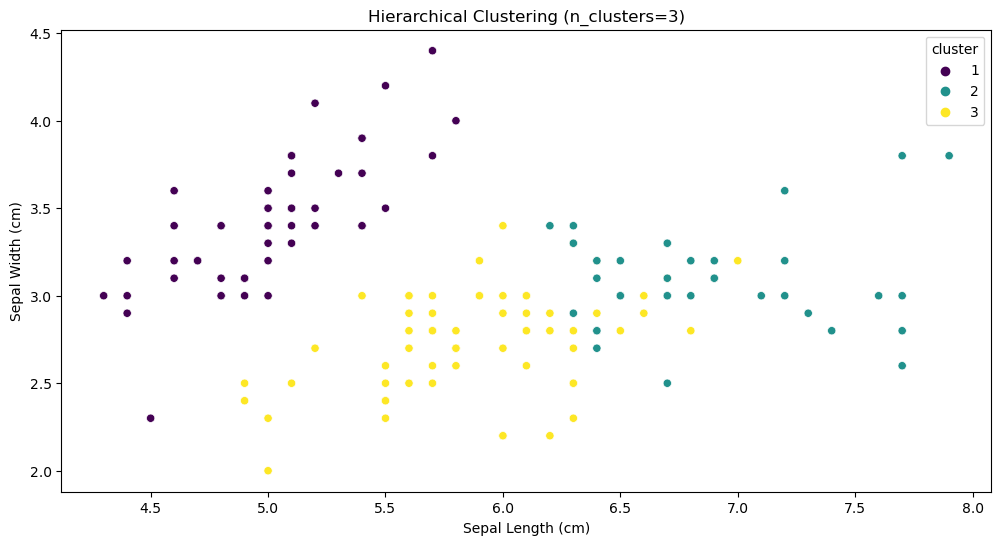

In [15]:
# Choose an appropriate number of clusters
n_clusters = 3 
clusters = fcluster(linked, n_clusters, criterion='maxclust')

df['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(12, 6))

# Plot the clusters in the feature space
sns.scatterplot(x='sepal_length', y='sepal_width', hue='cluster', palette='viridis', data=df, legend='full')
plt.title('Hierarchical Clustering (n_clusters=3)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.show()

5. Comparing Clustering Algorithms
Task: Compare the performance of K-Means and Agglomerative Hierarchical Clustering on the Iris dataset. Discuss the strengths and weaknesses of each approach based on the results.

K-Means Clustering

In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

Agglomerative Hierarchical Clustering

In [31]:
# Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X)

In [35]:
# Evaluating the performance

kmeans_score = adjusted_rand_score(y, kmeans_labels)
agg_score = adjusted_rand_score(y, agg_labels)

print(f'Rand Index for K-Means Clustering Score: {kmeans_score}')
print(f'Rand Index for Agglomerative Hierarchical Clustering Score: {agg_score}')

Rand Index for K-Means Clustering Score: 0.7302382722834697
Rand Index for Agglomerative Hierarchical Clustering Score: 0.7311985567707746


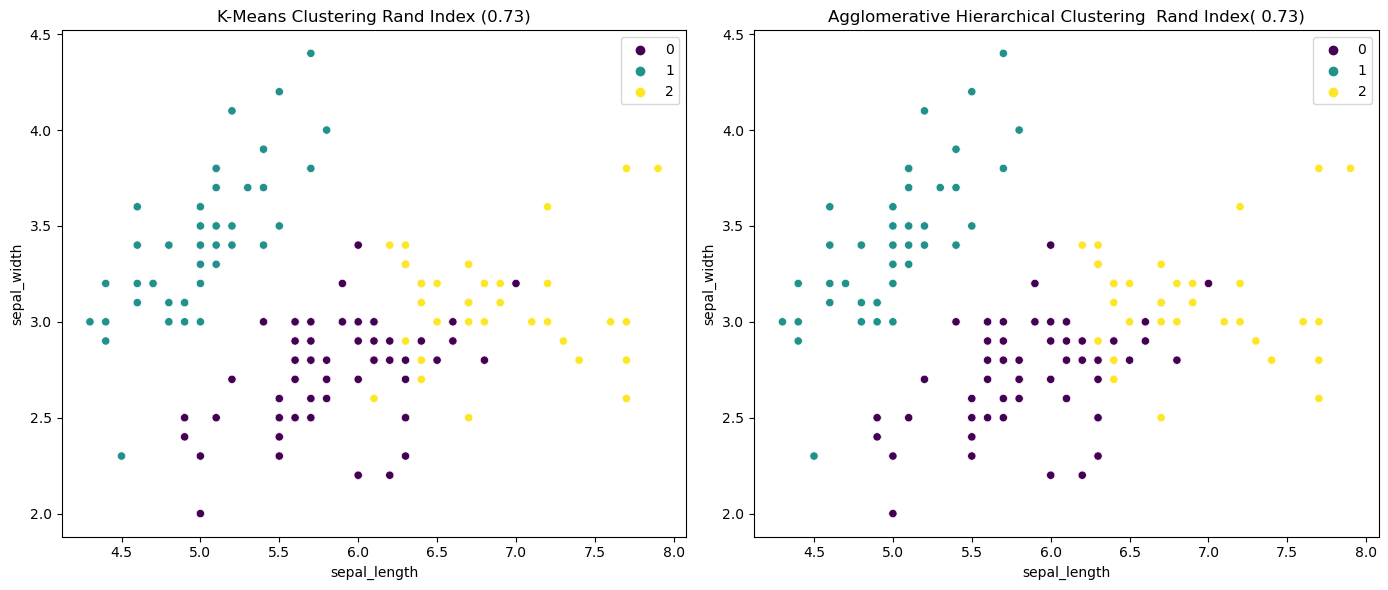

In [41]:
plt.figure(figsize=(14, 6))

# K-Means Clustering Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=kmeans_labels, palette='viridis', marker='o')
plt.title(f'K-Means Clustering Rand Index ({kmeans_score:.2f})')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])

# Agglomerative Hierarchical Clustering Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=agg_labels, palette='viridis', marker='o')
plt.title(f'Agglomerative Hierarchical Clustering  Rand Index( {agg_score:.2f})')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])

plt.tight_layout()
plt.show()

Conclusion

The given scores indicate that both methods perform similarly on the Iris dataset.

K-Means tends to be faster and works well with well-separated, spherical clusters, making it a good choice for large datasets where speed is crucial.

Agglomerative Hierarchical Clustering offers more flexibility in terms of cluster shapes and provides a visual representation of the clustering process, but it is computationally intensive and may struggle with very large datasets.